In [1]:
"for any vegetable do a classifier for separation of good and rotten vegetables of same vegetable"

'for any vegetable do a classifier for separation of good and rotten vegetables of same vegetable'

In [1]:
#import tensorflow as tf

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
## Importing Required Libraries
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Dense,Flatten,Dropout,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D
from keras.applications import MobileNetV2,InceptionResNetV2,VGG16
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [4]:
## Data Augmentation
train_datagen=ImageDataGenerator(rescale=1/255.0,zoom_range=0.2,shear_range=0.3,horizontal_flip=True,brightness_range=[0.5,1.5])
test_datagen=ImageDataGenerator(rescale=1/255.0)
val_datagen=ImageDataGenerator(rescale=1/255.0)

In [5]:
BATCH_SIZE=32
IMG_SHAPE=(224,224)

In [6]:

train_data=train_datagen.flow_from_directory(".\Orange_data\Train",
                                            target_size=IMG_SHAPE,batch_size=BATCH_SIZE,class_mode="binary")
test_data=train_datagen.flow_from_directory(".\Orange_data\Test",
                                            target_size=IMG_SHAPE,batch_size=BATCH_SIZE,class_mode="binary")
val_data=train_datagen.flow_from_directory(".\Orange_data\Validation",
                                            target_size=IMG_SHAPE,batch_size=BATCH_SIZE,class_mode="binary")

Found 3061 images belonging to 2 classes.
Found 391 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [7]:
train_data.class_indices

{'freshoranges': 0, 'rottenoranges': 1}

In [8]:
image_class_dict={0:"freshoranges",1:"rottenoranges"}

In [9]:
### Ploting Augmented Images
def plot_random_images():
    images,labels=train_data.next()
    plt.figure(figsize=(20,10))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(image_class_dict[labels[i]])
        

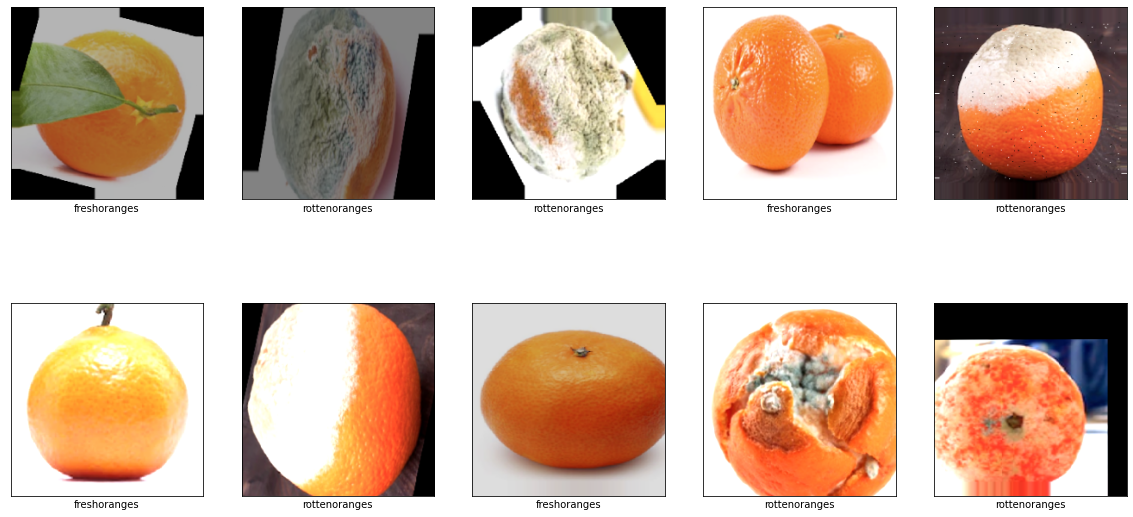

In [10]:
plot_random_images()

### Building Base CNN model

In [11]:
cnn_model=tf.keras.models.Sequential([
    Conv2D(16,3,activation="relu",input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(32,3,activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(64,3,activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(100,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [12]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [13]:
cnn_model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [14]:
history = cnn_model.fit_generator(train_data,validation_data=(val_data),epochs=10,steps_per_epoch=18,validation_steps=9)

Epoch 1/10
18/18 [==============================] - 73s 3s/step - loss: 1.1688 - accuracy: 0.4760 - val_loss: 0.5369 - val_accuracy: 0.8160
Epoch 2/10
18/18 [==============================] - 29s 2s/step - loss: 0.5158 - accuracy: 0.7855 - val_loss: 0.3632 - val_accuracy: 0.8542
Epoch 3/10
18/18 [==============================] - 26s 1s/step - loss: 0.3935 - accuracy: 0.8259 - val_loss: 0.3832 - val_accuracy: 0.8611
Epoch 4/10
18/18 [==============================] - 25s 1s/step - loss: 0.3058 - accuracy: 0.8758 - val_loss: 0.3060 - val_accuracy: 0.8993
Epoch 5/10
18/18 [==============================] - 23s 1s/step - loss: 0.2709 - accuracy: 0.8960 - val_loss: 0.3281 - val_accuracy: 0.8611
Epoch 6/10
18/18 [==============================] - 20s 1s/step - loss: 0.3209 - accuracy: 0.8724 - val_loss: 0.3720 - val_accuracy: 0.8576
Epoch 7/10
18/18 [==============================] - 20s 1s/step - loss: 0.3404 - accuracy: 0.8541 - val_loss: 0.2501 - val_accuracy: 0.9062
Epoch 8/10
18/18 [==

In [15]:
cnn_model.evaluate(test_data)

13/13 [==============================] - 16s 1s/step - loss: 0.2646 - accuracy: 0.8977


[0.2645857036113739, 0.8976982235908508]

Text(0.5, 0, 'Epochs')

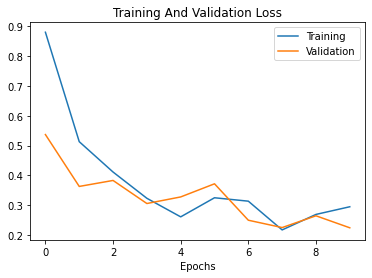

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title("Training And Validation Loss")
plt.xlabel("Epochs")

In [17]:
from keras.preprocessing import image
test_image = image.load_img('Orange_data/Test/freshoranges/orange_fresh (28).png', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
print(result[0])

[0.]


In [18]:
from keras.preprocessing import image
test_image = image.load_img('Orange_data/Test/rottenoranges/orange_rotten (33).png', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
print(result[0])

[1.]


In [19]:
from keras.preprocessing import image
test_image = image.load_img('Orange_data/Test/rottenoranges/orange_rotten (33).png', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
print(result[0])

[1.]
